In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/avocado.csv')

# Preprocessing

In [4]:
# Display the first few rows of the dataset
df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
# Check the shape of the dataset
df.shape




(16468, 14)

In [6]:
# Check the data types of the columns
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [7]:
# Check if there are any missing values
df.isnull().sum()


Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [8]:
# Remove unnecessary columns
df = df.drop(['Unnamed: 0'], axis=1)

In [9]:
# Check if there are any missing values
df.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [10]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
# Sort the dataset by date in ascending order
df = df.sort_values('Date')


In [13]:
# Check the unique values in the 'type' column
df['type'].unique()


array(['conventional', nan], dtype=object)

In [14]:
# Convert 'type' column to numerical values
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [15]:
# Check the unique values in the 'region' column
df['region'].nunique()

51

In [16]:
# Remove regions with less than 10 observations
region_counts = df['region'].value_counts()
df = df[df['region'].isin(region_counts[region_counts >= 10].index)]

In [17]:
# Check the summary statistics of the numerical columns
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
count,1496.000000,1.496000e+03,1.496000e+03,1.496000e+03,1.496000e+03,1.496000e+03,1.496000e+03,1.496000e+03,1496.000000,1496.0,1496.000000
mean,1.075455,1.597561e+06,6.379179e+05,6.161728e+05,5.079332e+04,2.926768e+05,2.487126e+05,4.175912e+04,2205.098590,0.0,2015.165107
std,0.189648,4.461233e+06,1.955818e+06,1.684057e+06,1.386904e+05,7.629175e+05,6.519299e+05,1.178925e+05,7504.334881,0.0,0.371401
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000
25%,0.980000,1.462992e+05,2.004112e+04,4.109676e+04,8.659425e+02,3.571706e+04,2.953163e+04,5.639300e+02,0.000000,0.0,2015.000000
50%,1.080000,3.978284e+05,7.815439e+04,1.118761e+05,7.321115e+03,7.308113e+04,6.082888e+04,4.985080e+03,0.000000,0.0,2015.000000
75%,1.190000,9.551628e+05,3.639736e+05,4.868930e+05,2.927145e+04,1.513566e+05,1.371529e+05,2.826535e+04,409.167500,0.0,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000


# EDA & Visualization

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

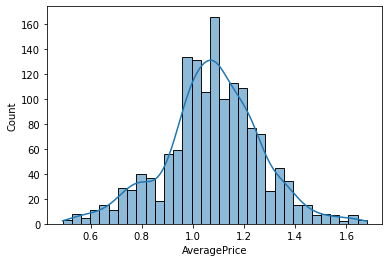

In [18]:
# Visualize the distribution of the target variable 'AveragePrice'
sns.histplot(df['AveragePrice'], kde=True)

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

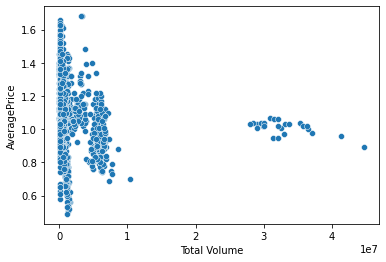

In [19]:
# Visualize the relationship between 'AveragePrice' and 'Total Volume'
sns.scatterplot(x='Total Volume', y='AveragePrice', data=df)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

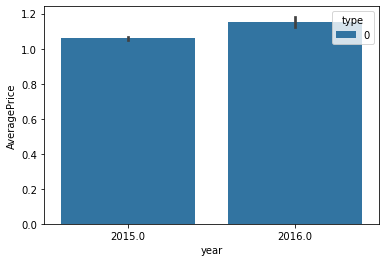

In [20]:
# Visualize the average price by year and type
sns.barplot(x='year', y='AveragePrice', hue='type', data=df)

<AxesSubplot:>

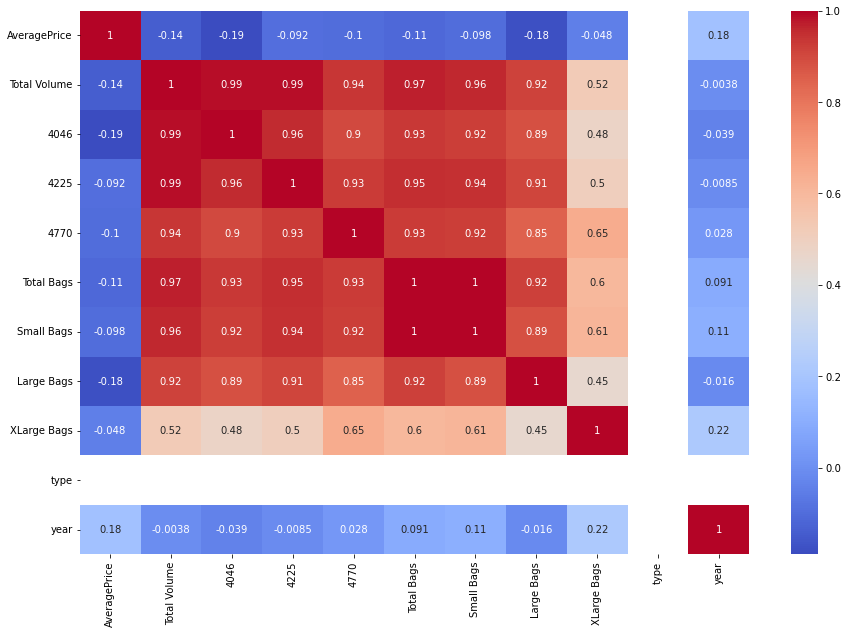

In [24]:
# Visualize the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Linear Regression Model

In [25]:
# Splitting the data into features and target
X = df.drop(['AveragePrice', 'Date', 'region'], axis=1)
y = df['AveragePrice']

In [26]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Scale the numerical features
scaler = StandardScaler()
num_cols = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

##### Training the model

In [28]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('Linear Regression R-squared:', r2_score(y_test, lr_pred))
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, lr_pred)))

Linear Regression R-squared: 0.19081359953001087
Linear Regression RMSE: 0.1837946552357284


In [29]:
# Decision Tree Regression
dt = DecisionTreeRegressor


In [30]:
dt

sklearn.tree._classes.DecisionTreeRegressor

In [31]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [32]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    regression=LinearRegression()
    regression.fit(X_train,y_train)
    
    pred=regression.predict(X_train)
    training=regression.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=regression.predict(X_test)
    testing=regression.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 18.457384896151176 RandomState 0
Testing Score 19.439852596993966 RandomState 0


MAXINING TESTING SCORE 19.439852596993966 ON RANDOM STATE OF 0
Training Score 18.23555270214915 RandomState 1
Testing Score 19.164612962308126 RandomState 1


Training Score 17.8577693371869 RandomState 2
Testing Score 19.903081806508062 RandomState 2


MAXINING TESTING SCORE 19.903081806508062 ON RANDOM STATE OF 2
Training Score 19.03121868334385 RandomState 3
Testing Score 15.943498890807561 RandomState 3


Training Score 19.356205174605446 RandomState 4
Testing Score 15.630776695525839 RandomState 4


Training Score 18.606637027720186 RandomState 5
Testing Score 18.31535854596079 RandomState 5


Training Score 18.52277033301084 RandomState 6
Testing Score 18.513316683878877 RandomState 6


Training Score 19.437518072566164 RandomState 7
Testing Score 16.374262034615594 RandomState 7


Training Score 19.442790746215987 RandomState 8
Testing Score 15.283006272779943 RandomState 8


Trainin

Training Score 20.2181837597206 RandomState 91
Testing Score 13.152903812779149 RandomState 91


Training Score 17.763784265713067 RandomState 92
Testing Score 20.789455468433747 RandomState 92


Training Score 18.605203073934383 RandomState 93
Testing Score 18.301583445926283 RandomState 93


Training Score 19.093437501951428 RandomState 94
Testing Score 17.13778909460959 RandomState 94


Training Score 21.625174678404115 RandomState 95
Testing Score 5.1409322825904376 RandomState 95


Training Score 18.32496409054446 RandomState 96
Testing Score 18.64016796797233 RandomState 96


Training Score 19.084161100391828 RandomState 97
Testing Score 17.023808025095267 RandomState 97


Training Score 19.56712246385347 RandomState 98
Testing Score 15.156551508101067 RandomState 98


Training Score 20.906876591082113 RandomState 99
Testing Score 9.7405423912879 RandomState 99


Training Score 17.36096696997056 RandomState 100
Testing Score 21.79602964394246 RandomState 100


Training Score 19.0

Training Score 18.56239117581876 RandomState 178
Testing Score 17.92894379601111 RandomState 178


Training Score 17.386355988934366 RandomState 179
Testing Score 22.171185088554267 RandomState 179


Training Score 19.292584548741544 RandomState 180
Testing Score 16.4885882405591 RandomState 180


Training Score 17.83062639462939 RandomState 181
Testing Score 20.122974211390453 RandomState 181


Training Score 19.79443884535077 RandomState 182
Testing Score 13.020852774943181 RandomState 182


Training Score 18.79426497842266 RandomState 183
Testing Score 18.138894779963888 RandomState 183


Training Score 17.052461106107806 RandomState 184
Testing Score 22.602330793864933 RandomState 184


Training Score 18.03231566947936 RandomState 185
Testing Score 20.39655018488076 RandomState 185


Training Score 18.866201650472735 RandomState 186
Testing Score 17.785425737637716 RandomState 186


Training Score 18.28294615978684 RandomState 187
Testing Score 20.03119203903453 RandomState 187


T

In [33]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 24.67224766929742 ON RANDOM STATE OF 196


In [34]:
#splliting our data into train test split and randomstate 6
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=113)

In [35]:
#Training the data on Linear Regression Model
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [36]:
#training score
regression.score(X_train,y_train)  

0.2074817972915758

In [37]:
#testing score
regression.score(X_test,y_test) 

0.0876655611210505

# Model Score
            Training Score = 20.74817972915758 %
            
            Testing Score = 87.6655611210505 %

In [38]:
y_pred=regression.predict(X_test)
y_pred

array([1.11958628, 1.12789477, 1.08434773, 1.06587312, 1.23219508,
       1.05852537, 1.16132689, 1.0415064 , 1.20470955, 1.30015384,
       1.09254474, 0.94287533, 0.90552726, 1.06842425, 1.06793663,
       1.14717724, 1.06953411, 1.05025379, 1.0686007 , 1.08560004,
       1.13917499, 1.06387465, 1.14030696, 1.12361122, 1.16073148,
       1.05974423, 1.06108627, 0.99007443, 1.14174185, 1.07777202,
       1.06119601, 1.07579177, 1.08512008, 1.08799547, 1.14153184,
       1.09603736, 1.07457446, 1.2237399 , 1.05309004, 1.05991293,
       0.87584782, 1.0884126 , 1.11831414, 1.14896119, 1.03264961,
       1.15842158, 1.08868595, 1.07570734, 1.04540992, 1.0877753 ,
       1.08176448, 1.14598272, 0.74217454, 1.07993621, 1.05353889,
       1.20062898, 1.09852313, 1.08005942, 0.99129673, 1.05873963,
       1.07862407, 1.01823008, 1.11104354, 1.03987098, 1.06207946,
       1.1377999 , 1.0054562 , 1.04638973, 1.07950221, 1.21478032,
       1.06630478, 1.09428928, 1.15260613, 1.06418088, 1.06279

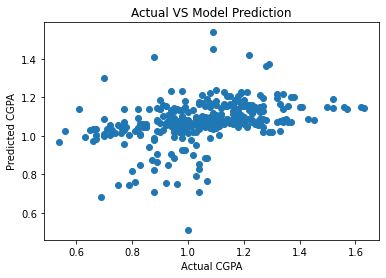

In [39]:
# how our pred vs actual look like in graph 
plt.scatter(y_test , y_pred)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual VS Model Prediction')
plt.show() 

# Checking MAE , MSE & RMSE scores

In [40]:
#error in terms of numbers
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [41]:
# again predict 
y_pred = regression.predict(X_test)

In [42]:
#MAE
mean_absolute_error(y_test,y_pred)

0.13179561567134515

In [43]:
#MSE
mean_squared_error(y_test,y_pred)

0.030142696030348977

In [44]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.1736165200387019

# Scores
        MAE SCORE = 13.179561567134515

        MSE SCORE = 30.142696030348977

        RMSE SCORE = 17.36165200387019

### LASSO MODEL

In [45]:
#import library
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [47]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Preprocess data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit LassoCV model
lasscv = LassoCV(alphas=None, max_iter=100)
lasscv.fit(X_train_scaled, y_train)

LassoCV(max_iter=100)

In [48]:
# best aplha parameter
alpha = lasscv.alpha_
alpha

0.0013146790559569643

In [49]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.0013146790559569643)

In [50]:
# now check r2 score
lasso_reg.score(X_test,y_test)

0.08621680627404749

# Scores 
       Best alpha parameter = 0.0013146790559569643)
       R2 Score    = 0.08621680627404749

# Ridge Model 


In [52]:

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))
ridgecv.fit(X_train , y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [53]:
# best aplha parameter
alpha = ridgecv.alpha_
alpha

0.09099999999999998

In [54]:
# now we have best parametr noe train according to it
ridge_reg = Ridge(alpha)
ridge_reg.fit (X_train,y_train)

Ridge(alpha=0.09099999999999998)

In [55]:
# now check r2 score
ridge_reg.score(X_test,y_test)

0.08766123832981221

# Scores: 

   Alpha score : 90.99999999999998 %
   
   R2 Score  :   87.66123832981221 %

# SCORES
        LASSO SCORES = 86. 21680627404749 %
        
        RIDGE SCORES = 87.66123832981221 %

### Observation : Based on the R2 scores, it seems that the Ridge model performs slightly better than the Lasso model for this dataset.

In [56]:
#Cross Vaildation
training=regression.score(X_train,y_train)
testing=regression.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(regression,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is 0.037891941970171816 and the R2 score for Training is 0.2074817972915758 and R2 score for the Testing is0.0876655611210505


At cross fold 3 the cv score is 0.06897851151486208 and the R2 score for Training is 0.2074817972915758 and R2 score for the Testing is0.0876655611210505


At cross fold 4 the cv score is 0.05589070582581587 and the R2 score for Training is 0.2074817972915758 and R2 score for the Testing is0.0876655611210505


At cross fold 5 the cv score is 0.08964809222564987 and the R2 score for Training is 0.2074817972915758 and R2 score for the Testing is0.0876655611210505


At cross fold 6 the cv score is 0.06855926758503872 and the R2 score for Training is 0.2074817972915758 and R2 score for the Testing is0.0876655611210505


At cross fold 7 the cv score is 0.07506940553320234 and the R2 score for Training is 0.2074817972915758 and R2 score for the Testing is0.0876655611210505


At cross fold 8 the cv score is 0.04873324998576099 and the R2 

# Cross-Validation Score
        Training Score = 20.74817972915758 %
        Testing Score = 87.6655611210505 %

# AdaBoostRegressor Model

In [57]:
# IMPORT LIBRARY 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [58]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    ada=AdaBoostRegressor()
    ada.fit(X_train,y_train)
    
    pred=ada.predict(X_train)
    training=ada.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=ada.predict(X_test)
    testing=ada.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 65.01242751119264 RandomState 0
Testing Score 57.913510259453105 RandomState 0


MAXINING TESTING SCORE 57.913510259453105 ON RANDOM STATE OF 0
Training Score 65.01396730139696 RandomState 1
Testing Score 64.45183292856697 RandomState 1


MAXINING TESTING SCORE 64.45183292856697 ON RANDOM STATE OF 1
Training Score 67.32971753555337 RandomState 2
Testing Score 65.54255093370053 RandomState 2


MAXINING TESTING SCORE 65.54255093370053 ON RANDOM STATE OF 2
Training Score 67.2212498721287 RandomState 3
Testing Score 59.23343827850096 RandomState 3


Training Score 65.15696892962168 RandomState 4
Testing Score 54.35507163070207 RandomState 4


Training Score 67.34219103762248 RandomState 5
Testing Score 58.990522351271494 RandomState 5


Training Score 65.75685176738618 RandomState 6
Testing Score 59.82061332178341 RandomState 6


Training Score 65.80949471222584 RandomState 7
Testing Score 59.06835418494693 RandomState 7


Training Score 65.68443420588659 RandomState 8
Testi

Training Score 64.93305247788672 RandomState 83
Testing Score 60.66395850047409 RandomState 83


Training Score 65.31371756652011 RandomState 84
Testing Score 59.56840411761664 RandomState 84


Training Score 65.20568568927392 RandomState 85
Testing Score 59.38593171116199 RandomState 85


Training Score 66.11696594120782 RandomState 86
Testing Score 61.20991844751138 RandomState 86


Training Score 65.614666316749 RandomState 87
Testing Score 63.24662002682355 RandomState 87


Training Score 67.29336828022157 RandomState 88
Testing Score 64.4420081775084 RandomState 88


Training Score 67.25399170735005 RandomState 89
Testing Score 61.89125934590829 RandomState 89


Training Score 66.026509153173 RandomState 90
Testing Score 53.79502429856491 RandomState 90


Training Score 67.03514831363343 RandomState 91
Testing Score 59.44984010255374 RandomState 91


Training Score 62.09640966433203 RandomState 92
Testing Score 66.63501452202136 RandomState 92


Training Score 63.89800225953077 Ra

Training Score 66.72320538630278 RandomState 166
Testing Score 62.850847091246244 RandomState 166


Training Score 65.90039558872431 RandomState 167
Testing Score 60.34822264342894 RandomState 167


Training Score 65.7656821330242 RandomState 168
Testing Score 61.35967293363449 RandomState 168


Training Score 63.97459846302199 RandomState 169
Testing Score 63.749800992332936 RandomState 169


Training Score 67.60542451924425 RandomState 170
Testing Score 61.00702350826981 RandomState 170


Training Score 64.70465318229309 RandomState 171
Testing Score 62.57511263164355 RandomState 171


Training Score 66.97053055287432 RandomState 172
Testing Score 59.115870498451315 RandomState 172


Training Score 66.69842373098585 RandomState 173
Testing Score 60.59409900424054 RandomState 173


Training Score 64.62320893929909 RandomState 174
Testing Score 64.30518092510506 RandomState 174


Training Score 63.490852601260315 RandomState 175
Testing Score 63.82833527905398 RandomState 175


Trainin

In [59]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 67.56478455541439 ON RANDOM STATE OF 108


#### Training the model

In [60]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)

In [61]:
# adaboost inilize
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [62]:
 # model prediction on training dataset
y_pred = ada.predict(X_train)

In [63]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.6636005598711023


In [64]:
# model prediction on testing datadet
pred = ada.predict(X_test)

In [65]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.5698662951474189


In [ ]:
Model Scores
Training Score = 66.36005598711023 %
testing Score = 56.98662951474189 %

# Hyperparameter Tuning for Ada Boost

In [66]:
### HYPERPARAMETER TUNING ###
from sklearn.model_selection import RandomizedSearchCV

In [67]:
params = {'n_estimators': [45,47,53,55,60,70] , 
          'learning_rate':[0.25,0.30,0.40]}

In [68]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor() , cv=5 , param_distributions=params , n_jobs=-1)

In [69]:
rnd_srch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [45, 47, 53, 55, 60,
                                                         70]})

In [70]:
rnd_srch.best_params_

{'n_estimators': 70, 'learning_rate': 0.4}

In [71]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=70)

In [72]:
ada = AdaBoostRegressor(learning_rate=0.4, n_estimators=45)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

print ('=== Testing Score ===')
print (metrics.r2_score(y_test,y_pred))

=== Testing Score ===
0.5704955529417414


#### Model Score after Hyperparameter Tuning
          Testing Score : 57.04955529417414%

# Cross Validation for Ada Boost

In [74]:
#Cross Vaildation
training=ada.score(X_train,y_train)
testing=ada.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(ada,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is 0.45288069421520993 and the R2 score for Training is 0.6380877125117126 and R2 score for the Testing is0.5704955529417414


At cross fold 3 the cv score is 0.4652454857097868 and the R2 score for Training is 0.6380877125117126 and R2 score for the Testing is0.5704955529417414


At cross fold 4 the cv score is 0.4776616154904958 and the R2 score for Training is 0.6380877125117126 and R2 score for the Testing is0.5704955529417414


At cross fold 5 the cv score is 0.4902362497075073 and the R2 score for Training is 0.6380877125117126 and R2 score for the Testing is0.5704955529417414


At cross fold 6 the cv score is 0.48305177441058506 and the R2 score for Training is 0.6380877125117126 and R2 score for the Testing is0.5704955529417414


At cross fold 7 the cv score is 0.5111770426875003 and the R2 score for Training is 0.6380877125117126 and R2 score for the Testing is0.5704955529417414


At cross fold 8 the cv score is 0.521924605102885 and the R2 score f

#### Cross Validation score
Training score = 63.80877125117126 %

Testing Score =57.04955529417414 %

# RandomForestRegressor Model

In [75]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [76]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(X_train,y_train)
    
    pred=rf.predict(X_train)
    training=rf.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=rf.predict(X_test)
    testing=rf.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 97.13060868752325 RandomState 0
Testing Score 78.56517987741636 RandomState 0


MAXINING TESTING SCORE 78.56517987741636 ON RANDOM STATE OF 0
Training Score 97.10037306352797 RandomState 1
Testing Score 82.36649842700257 RandomState 1


MAXINING TESTING SCORE 82.36649842700257 ON RANDOM STATE OF 1
Training Score 97.06414054619005 RandomState 2
Testing Score 81.7733960088368 RandomState 2


Training Score 97.3786016927846 RandomState 3
Testing Score 77.61777571038797 RandomState 3


Training Score 97.24378588026688 RandomState 4
Testing Score 79.34568916683789 RandomState 4


Training Score 97.15822354009312 RandomState 5
Testing Score 79.04608036734184 RandomState 5


Training Score 97.29522476491438 RandomState 6
Testing Score 78.47040189363126 RandomState 6


Training Score 97.32898518534094 RandomState 7
Testing Score 77.84004798039743 RandomState 7


Training Score 97.0591971970425 RandomState 8
Testing Score 82.4436716881528 RandomState 8


MAXINING TESTING SCORE 82

Training Score 97.38946188782734 RandomState 81
Testing Score 77.23899835901192 RandomState 81


Training Score 97.27634205253216 RandomState 82
Testing Score 80.01986076932926 RandomState 82


Training Score 97.18906709492774 RandomState 83
Testing Score 76.1752566293502 RandomState 83


Training Score 97.15769519454967 RandomState 84
Testing Score 80.2076258577893 RandomState 84


Training Score 97.18544501503813 RandomState 85
Testing Score 79.72891488464388 RandomState 85


Training Score 96.8325012002366 RandomState 86
Testing Score 81.29950066817419 RandomState 86


Training Score 97.16094414478665 RandomState 87
Testing Score 82.78885010782098 RandomState 87


Training Score 97.11062438869857 RandomState 88
Testing Score 82.74492381157553 RandomState 88


Training Score 97.13191680330414 RandomState 89
Testing Score 81.01711462294132 RandomState 89


Training Score 97.18613423735928 RandomState 90
Testing Score 77.60406761954837 RandomState 90


Training Score 97.13281922686377 

Training Score 97.24579537781486 RandomState 164
Testing Score 81.72119525937286 RandomState 164


Training Score 97.26119680291355 RandomState 165
Testing Score 80.2224342709512 RandomState 165


Training Score 97.0937710724688 RandomState 166
Testing Score 81.46173716310442 RandomState 166


Training Score 97.4021269624316 RandomState 167
Testing Score 79.34848880292277 RandomState 167


Training Score 96.7992864440497 RandomState 168
Testing Score 80.1735668747359 RandomState 168


Training Score 97.10990978353482 RandomState 169
Testing Score 82.19084277630024 RandomState 169


Training Score 96.99154874242217 RandomState 170
Testing Score 77.34377394677392 RandomState 170


Training Score 97.05758201927186 RandomState 171
Testing Score 78.21756997484226 RandomState 171


Training Score 97.12311860097249 RandomState 172
Testing Score 73.86800974975691 RandomState 172


Training Score 97.0366134093167 RandomState 173
Testing Score 81.21381007981479 RandomState 173


Training Score 9

In [77]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 85.39453113543446 ON RANDOM STATE OF 179


#### Training the model

In [78]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=161)

In [79]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [80]:
 # model prediction on training dataset
y_pred = rf.predict(X_train)

In [81]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9740080267397228


In [82]:
# model prediction on testing datadet
pred = rf.predict(X_test)

In [83]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.8114321401659708


# Model Score
Training Score = 97.40080267397228 %

Testing Score = 81.14321401659708 %

### Hyperparameter tuning for Random Forest

In [84]:
# RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [85]:
# define parameters
parameters={'criterion':['mse','mae','poisson'],
           'max_features':['auto','sqrt','log2'],
           'min_samples_split':[1,11],
           'max_depth':[1,15],
           'min_samples_leaf':[1,7]}

In [86]:
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [1, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 7],
                         'min_samples_split': [1, 11]})

In [87]:
#reassign best parameters
rf=RandomForestRegressor(criterion= 'poisson', max_depth= 15, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 11)
rf.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=15, max_features='auto',
                      min_samples_split=11)

In [88]:
print ('Training R2 Score: ' ,rf.score(X_train,y_train)*100)

Training R2 Score:  92.80926145354157


In [89]:
pred_decision=rf.predict(X_test)
from sklearn.metrics import r2_score
rfs = r2_score(y_test,pred_decision)

In [90]:
print('Testing R2 Score:' , rfs*100)

Testing R2 Score: 79.09594402980997


# Model Score after Hyperparameter Tuning
Training Score = 92.80926145354157 %

Testing Score = 79.09594402980997 %

# Cross Validation for Random Forest

In [91]:
#Cross Vaildation
training=rf.score(X_train,y_train)
testing=rf.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is 0.5620920403978393 and the R2 score for Training is 0.9280926145354157 and R2 score for the Testing is0.7909594402980997


At cross fold 3 the cv score is 0.608494876702289 and the R2 score for Training is 0.9280926145354157 and R2 score for the Testing is0.7909594402980997


At cross fold 4 the cv score is 0.6391902496085341 and the R2 score for Training is 0.9280926145354157 and R2 score for the Testing is0.7909594402980997


At cross fold 5 the cv score is 0.6625585024778441 and the R2 score for Training is 0.9280926145354157 and R2 score for the Testing is0.7909594402980997


At cross fold 6 the cv score is 0.6553450096086889 and the R2 score for Training is 0.9280926145354157 and R2 score for the Testing is0.7909594402980997


At cross fold 7 the cv score is 0.701995138188254 and the R2 score for Training is 0.9280926145354157 and R2 score for the Testing is0.7909594402980997


At cross fold 8 the cv score is 0.7037178485372283 and the R2 score for 

#### Cross Validation score
Training score = 92.80926145354157 %


Testing Score = 79.09594402980997 %

# GradientBoostingRegressor Model

In [92]:
# import library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile , chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
Finding the best random state

In [94]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    gbdt=GradientBoostingRegressor()
    gbdt.fit(X_train,y_train)
    
    pred=gbdt.predict(X_train)
    training=gbdt.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=gbdt.predict(X_test)
    testing=gbdt.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 84.91765357629416 RandomState 0
Testing Score 71.28970420169662 RandomState 0


MAXINING TESTING SCORE 71.28970420169662 ON RANDOM STATE OF 0
Training Score 83.97055715802539 RandomState 1
Testing Score 74.90532922583132 RandomState 1


MAXINING TESTING SCORE 74.90532922583132 ON RANDOM STATE OF 1
Training Score 85.02726910112926 RandomState 2
Testing Score 73.26386890892545 RandomState 2


Training Score 85.17498994692873 RandomState 3
Testing Score 70.04377943528462 RandomState 3


Training Score 84.84129136210218 RandomState 4
Testing Score 70.1942086685332 RandomState 4


Training Score 84.60830806588744 RandomState 5
Testing Score 71.51566845671297 RandomState 5


Training Score 85.03828040040294 RandomState 6
Testing Score 71.65641986628566 RandomState 6


Training Score 84.85807597060573 RandomState 7
Testing Score 68.53455877043568 RandomState 7


Training Score 83.84669826337161 RandomState 8
Testing Score 72.77676831584749 RandomState 8


Training Score 84.2393

Training Score 84.68619107659082 RandomState 82
Testing Score 68.76568933201726 RandomState 82


Training Score 85.55178119510555 RandomState 83
Testing Score 71.3997212218606 RandomState 83


Training Score 84.579258270155 RandomState 84
Testing Score 71.26144092066494 RandomState 84


Training Score 84.54586848645019 RandomState 85
Testing Score 71.40660029793709 RandomState 85


Training Score 83.98553487228416 RandomState 86
Testing Score 75.14237630318937 RandomState 86


Training Score 84.72801320760377 RandomState 87
Testing Score 75.13191419110203 RandomState 87


Training Score 83.20974589415846 RandomState 88
Testing Score 72.63645301028102 RandomState 88


Training Score 83.87782745120036 RandomState 89
Testing Score 72.68561011167918 RandomState 89


Training Score 85.2227948632034 RandomState 90
Testing Score 68.67945700403536 RandomState 90


Training Score 85.07944571734623 RandomState 91
Testing Score 70.981313845549 RandomState 91


Training Score 84.08111082559745 Ran

Training Score 84.6725845172683 RandomState 165
Testing Score 71.99617000285734 RandomState 165


Training Score 83.77253752969311 RandomState 166
Testing Score 72.85077145450309 RandomState 166


Training Score 84.62777265550663 RandomState 167
Testing Score 73.32543367009843 RandomState 167


Training Score 83.35182861884567 RandomState 168
Testing Score 71.89124608746079 RandomState 168


Training Score 83.56003094388144 RandomState 169
Testing Score 73.74408707071623 RandomState 169


Training Score 85.8991191080315 RandomState 170
Testing Score 69.4373126863608 RandomState 170


Training Score 85.62648142712726 RandomState 171
Testing Score 71.85109273413732 RandomState 171


Training Score 85.55290688026561 RandomState 172
Testing Score 66.5802309003955 RandomState 172


Training Score 85.00586566078255 RandomState 173
Testing Score 72.93840033970109 RandomState 173


Training Score 84.20945494529258 RandomState 174
Testing Score 75.44105850619593 RandomState 174


Training Score

#### Training Score 84.21676525330648
#### Testing Score 71.71310257205931 

# Hyperparameter tuning for GradientBoostingRegressor

In [95]:
# HYPERPARAMETER TUNING #
from sklearn.model_selection import GridSearchCV

In [96]:
# internally it will use decision tree as name suggest GBDT and here we are going to add one new parameter i.e learning rate 

grid_params = {'max_depth' : range(1,8),
               'min_samples_split': range(2,12,1),
               'learning_rate': np.arange(0.1 , 0.9),
               'n_estimators': [90,95,100,105,110]}

In [97]:
grid = GridSearchCV(GradientBoostingRegressor() , param_grid = grid_params , n_jobs = -1)

In [98]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(1, 8),
                         'min_samples_split': range(2, 12),
                         'n_estimators': [90, 95, 100, 105, 110]})

In [99]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_samples_split': 3,
 'n_estimators': 90}

In [100]:
gbdt_clf = GradientBoostingRegressor(learning_rate= 0.1,
 max_depth= 7,
 min_samples_split= 5,
 n_estimators= 110)

In [101]:
gbdt_clf.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=7, min_samples_split=5, n_estimators=110)

In [102]:
 # model prediction on training dataset
y_pred = gbdt_clf.predict(X_train)

In [103]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9932361161862017


In [104]:
# model prediction on testing datadet
pred = gbdt_clf.predict(X_test)

In [105]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.8120941648470938


# Model  Scores:
   ####  Training  Score :  99.32361161862017%
   ####   Testing Score :   81.20941648470938  %
   
   
   
   